In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
username = 'oyelistic'
token = '7214d9f57d85576a'
datastream = 'anxaoscpcfM1.b1'
startdate = '2020-03-09'
enddate = '2020-03-15'

In [3]:
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] anxaoscpcfM1.b1.20200309.000000.nc
[DOWNLOADING] anxaoscpcfM1.b1.20200314.000000.nc
[DOWNLOADING] anxaoscpcfM1.b1.20200312.000000.nc
[DOWNLOADING] anxaoscpcfM1.b1.20200313.000000.nc
[DOWNLOADING] anxaoscpcfM1.b1.20200311.000000.nc
[DOWNLOADING] anxaoscpcfM1.b1.20200310.000000.nc

If you use these data to prepare a publication, please cite:

Koontz, A., Kuang, C., Andrews, E., Hayes, C., Singh, A., & Salwen, C.
Condensation Particle Counter (AOSCPCF). Atmospheric Radiation Measurement (ARM)
User Facility. https://doi.org/10.5439/1352536



In [4]:
ds_mpl = act.io.read_arm_netcdf(result)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [5]:
ds_mpl

<xarray.Dataset> Size: 48MB
Dimensions:            (time: 518397)
Coordinates:
  * time               (time) datetime64[ns] 4MB 2020-03-09T00:00:00.670000 ....
Data variables: (12/18)
    base_time          (time) datetime64[ns] 4MB 2020-03-09 ... 2020-03-14
    time_offset        (time) datetime64[ns] 4MB 2020-03-09T00:00:00.670000 ....
    concentration      (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    qc_concentration   (time) int32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    saturation_temp    (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    condensation_temp  (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    ...                 ...
    liquid_level       (time) float64 4MB dask.array<chunksize=(86399,), meta=np.ndarray>
    fraction_full      (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    corrected_flow     (time) float32 2MB dask.array<chunksize=(86399,), meta=np.ndarray>
    lat                (time) float32 2MB 69.14 69.14 69.14 ... 69.14 69.14
    lon                (time) float32 2MB 15.68 15.68 15.68 ... 15.68 15.68
    alt                (time) float32 2MB 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
Attributes: (12/25)
    command_line:                aoscpcfcorr -s anx -f M1 -DR
    Conventions:                 ARM-1.2
    process_version:             ingest-aoscpcfcorr-2.4-0.el7
    dod_version:                 aoscpcf-b1-4.0
    site_id:                     anx
    platform_id:                 aoscpcf
    ...                          ...
    doi:                         10.5439/1352536
    history:                     created by user dsmgr on machine flint at 20...
    _file_dates:                 ['20200309', '20200310', '20200311', '202003...
    _file_times:                 ['000000', '000000', '000000', '000000', '00...
    _datastream:                 anxaoscpcfM1.b1
    _arm_standards_flag:         1

In [6]:
variable = ds_mpl['concentration']

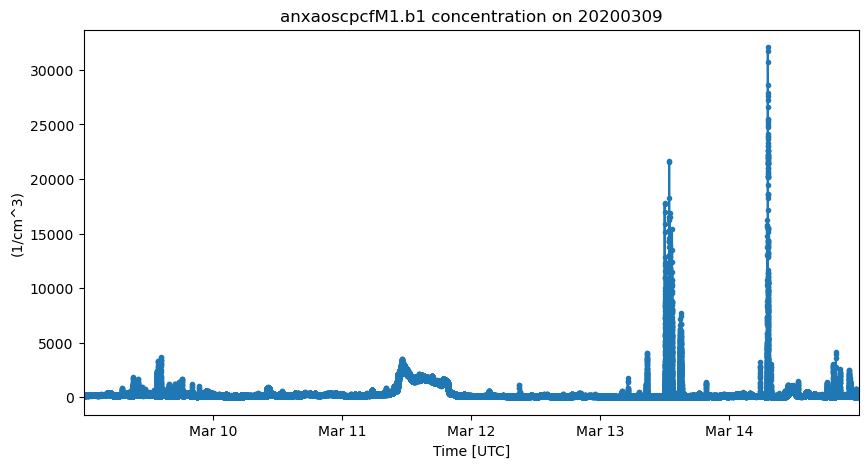

In [7]:
#ds_mpl = act.corrections.correct_mpl(ds_mpl)
display = act.plotting.TimeSeriesDisplay(ds_mpl, figsize=(10, 5), subplot_shape=(1,))
display.plot('concentration', subplot_index=(0,))
plt.show()
